## Project - Vehicle Detection and Tracking

---
## Overview
The goal of this project is to write a software pipeline to implement a  software pipeline to detect vehicles in a video.

[Animation Place holder]()


### Histogram of Oriented Gradients
The first step of this project is to extract the HOG features in the training data and then use them to train the linear SVM. Here the sample images of the training data.
[!png]() [!png]()
  
The training on 2580 samples shows an accuracy of 0.9838.


### Sliding Window Search
To search the cars in the image I use the sliding window method. This is to reduce the search time and only focus on the region of interest. In each window, I extract the features, scale and feed to the Linear SVM classifier to predict the occurance of the car in that window. If a car is detected it would be added to a list.

The following codes show a combination of different windows.

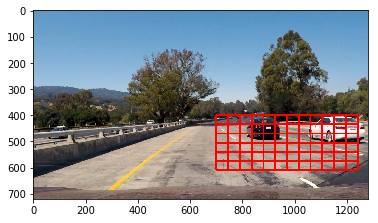

In [71]:
windows1 = slide_window(images[0], x_start_stop=[700, None], y_start_stop=[400, 640], 
                xy_window=(90, 70), xy_overlap=(0.5, 0.5))
window_img = draw_boxes(image, windows1, color=(0, 0, 255), thick=6) 
show_image(window_img)

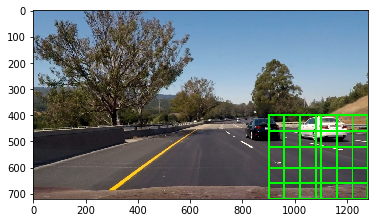

In [80]:
windows2 = slide_window(images[0], x_start_stop=[900, None], y_start_stop=[400, None], 
                xy_window=(200, 200), xy_overlap=(0.7, 0.7))
window_img = draw_boxes(image, windows2, color=(0, 255, 0), thick=6) 
show_image(window_img)

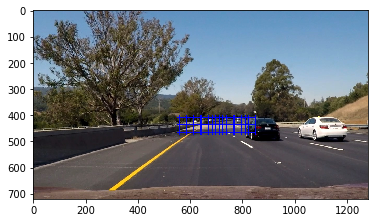

In [82]:
windows3 = slide_window(images[0], x_start_stop=[550, 850], y_start_stop=[400, 480], 
                xy_window=(30, 30), xy_overlap=(0.7, 0.7))
window_img = draw_boxes(image, windows3, color=(255, 0, 0), thick=1) 
show_image(window_img)

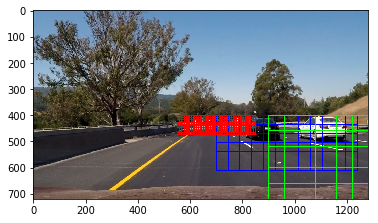

In [83]:
windows = windows1 + windows2 + windows3
window_img = draw_boxes(image, windows1, color=(255, 0, 0), thick=2) 
window_img = draw_boxes(window_img, windows2, color=(0, 255, 0), thick=2) 
window_img = draw_boxes(window_img, windows3, color=(0, 0, 255), thick=2) 
show_image(window_img)

In [ ]:
Here are some sample detections.  

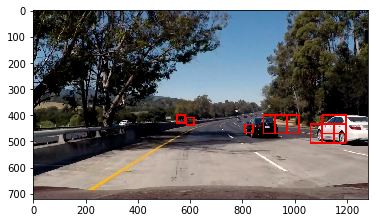

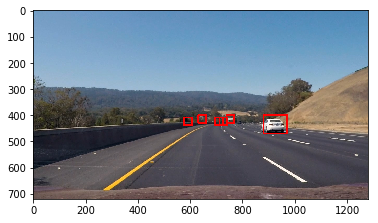

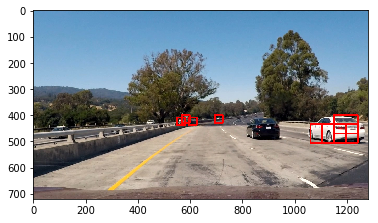

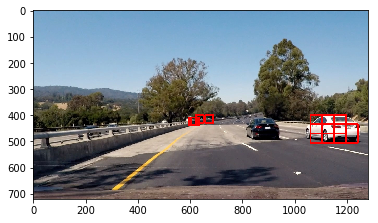

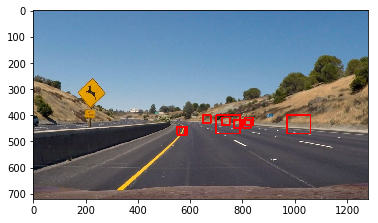

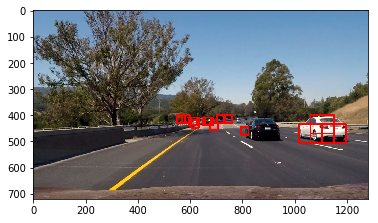

In [84]:
for image in images:
    image_test = cv2.GaussianBlur(image, (15, 15), 0)
    draw_image = np.copy(image)
    hot_windows = []
    hot_windows += (search_windows(image_test, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat))                       
    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)    
    show_image(window_img)

### Discussion

1. The first problem I have is the different format of the image. The format of cv2 is BGR but the format of the video image is RGB. To avoid misdetection I convert the training image to RGB format.

2. The second problem I have is that the detection is not continous. To fix this issue I increased the queue of the past frames.

3. There are still some false positive and false negative. To improve the performance I should train the classifier with more data.